In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
marathon = pd.read_csv('C:/Users/Mariusz Baran/Data_Science_kurs/Data_science_pliki/course-files/marathon_results_2017.csv',
                       usecols=["Age","M/F","Country","40K"])
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
marathon.head()

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


<AxesSubplot:xlabel='Age', ylabel='TimeSeconds'>

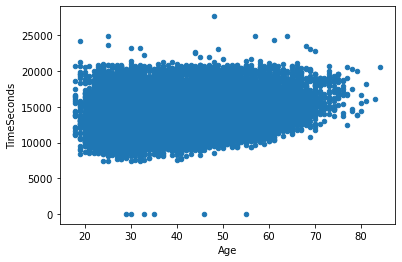

In [4]:
marathon.plot(kind='scatter', x='Age', y='TimeSeconds')

In [8]:
man = marathon['M/F'] == 'M'
woman = marathon['M/F'] == 'F'
marathon_m = marathon[man]
marathon_w = marathon[woman]

<AxesSubplot:xlabel='Age', ylabel='TimeSeconds'>

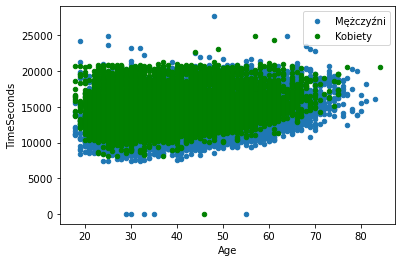

In [9]:
ax = marathon_m.plot.scatter(x='Age', y='TimeSeconds', label='Mężczyźni')
marathon_w.plot.scatter(x='Age', y='TimeSeconds', label='Kobiety', color='Green', ax=ax)

<AxesSubplot:title={'center':'Kobiety'}, xlabel='Age', ylabel='TimeSeconds'>

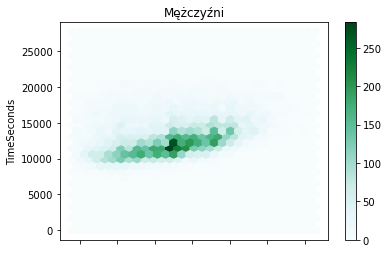

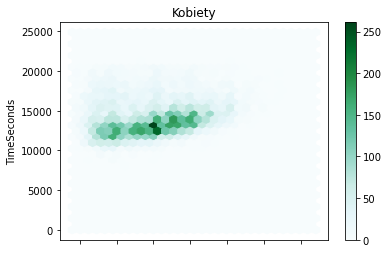

In [15]:
marathon_m.plot(kind='hexbin', x='Age', y='TimeSeconds', gridsize=30, title='Mężczyźni')
marathon_w.plot(kind='hexbin', x='Age', y='TimeSeconds', gridsize=30, title='Kobiety')

In [18]:
nasa=pd.read_csv("C:/Users/Mariusz Baran/Data_Science_kurs/Data_science_pliki/course-files/nasa_facebook_statuses.csv",
                 usecols=["status_published","num_likes"])
nasa["status_published"] =pd.to_datetime(nasa["status_published"])
filter=(nasa['status_published'] >='2016-5-1') & (nasa['status_published'] <'2016-6-1')
nasa=nasa[filter]
nasa['day'] =nasa.apply(lambda row: row["status_published"].day,axis=1)
nasa_by_day=nasa.groupby(by='day').sum()
bean=pd.read_csv("C:/Users/Mariusz Baran/Data_Science_kurs/Data_science_pliki/course-files/mrbean_facebook_statuses.csv",
            usecols=["status_published","num_likes"])
bean["status_published"] =pd.to_datetime(bean["status_published"])
filter=(bean['status_published'] >='2016-5-1') & (bean['status_published'] <'2016-6-1')
bean=bean[filter]
bean['day'] =bean.apply(lambda row: row["status_published"].day,axis=1)
bean_by_day=bean.groupby(by='day').sum()
days=nasa["day"].append(bean["day"])
days=days.unique()
fb=pd.DataFrame(index=days).sort_index()
fb['nasa'] =nasa_by_day["num_likes"]
fb['bean'] =bean_by_day["num_likes"]
fb.fillna(value=0, inplace=True)
fb.head()

,nasa,bean
1,60243,0.0
2,177989,0.0
3,50264,0.0
4,133302,26821.0
5,89657,0.0


<AxesSubplot:>

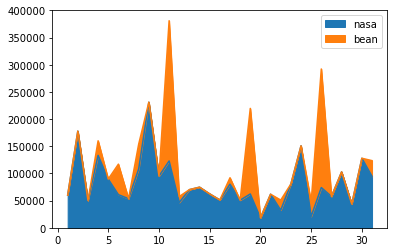

In [19]:
fb.plot(kind='area')